In [1]:
#importing the necessary packages
import pandas as pd
import string
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
import re
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\Nandhini\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.23.4
Pandas Version 1.3.4
Seaborn Version 0.11.2
Matplotlib Version 3.4.3


In [3]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [4]:
# import os
# os.chdir('C:\\GL Class\\Solution Preparation\EDA')
df= pd.read_csv('C:/Users/Nandhini/Downloads/Health+Care+Project/Data.csv')
df.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]

In [5]:
pd.options.display.max_columns = None

In [6]:
df.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  other_major_decs_history  Gender  \
0             4866   28                   1                         0    Male   
1             6411   50                   0                         0    Male   
2             4509   68                   0                         0  Female   
3             6214   51                   0                         0  Female   
4             4938   44                   0                         1    Male   

   avg_glucose_level   bmi   smoking_status  Year_last_admitted   Location  \
0                 97  31.2          Unknown                 NaN    Chennai   
1                212  34.2  formerly smoked                 NaN     Jaipur   
2                166  40.4  formerly smoked                 NaN     Jaipur   
3                109  22.9          Unknown                 NaN    Chennai   
4                118  26.5     never smoked              2004.0  Bangalore   

   weight covered_by_any_other_company Alcohol  exercise  \
0      67                            N    Rare  Moderate   
1      58                            N    Rare  Moderate   
2      73                            N   Daily   Extreme   
3      71                            Y    Rare        No   
4      74                            N      No   Extreme   

   weight_change_in_last_one_year  fat_percentage  insurance_cost  
0                               1              25           20978  
1                               3              27            6170  
2                               0              32           28382  
3                               3              37           27148  
4                               0              34           29616

In [7]:
df.shape

(25000, 24)

In [8]:
df["Gender"].value_counts()

Male      16422
Female     8578
Name: Gender, dtype: int64

In [9]:
df["exercise"].value_counts()

Moderate    14638
Extreme      5248
No           5114
Name: exercise, dtype: int64

In [10]:
df["years_of_insurance_with_us"].value_counts()

3    2990
8    2970
5    2941
0    2912
7    2873
1    2856
4    2846
6    2804
2    1808
Name: years_of_insurance_with_us, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [12]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

Year_last_admitted    11881
bmi                     990
dtype: int64

In [13]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 25000 
The number of columns (variables) is 24


In [14]:
df.describe()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
count  25000.000000                25000.000000               25000.000000   
mean   17499.500000                    4.089040                   0.773680   
std     7217.022701                    2.606612                   1.199449   
min     5000.000000                    0.000000                   0.000000   
25%    11249.750000                    2.000000                   0.000000   
50%    17499.500000                    4.000000                   0.000000   
75%    23749.250000                    6.000000                   1.000000   
max    29999.000000                    8.000000                   5.000000   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  \
count      25000.000000                25000.000000     25000.000000   
mean           0.081720                    3.104200      5215.889320   
std            0.273943                    1.141663      1053.179748   
min            0.000000                    0.000000      2034.000000   
25%            0.000000                    2.000000      4543.000000   
50%            0.000000                    3.000000      5089.000000   
75%            0.000000                    4.000000      5730.000000   
max            1.000000                   12.000000     11255.000000   

                age  heart_decs_history  other_major_decs_history  \
count  25000.000000        25000.000000              25000.000000   
mean      44.918320            0.054640                  0.098160   
std       16.107492            0.227281                  0.297537   
min       16.000000            0.000000                  0.000000   
25%       31.000000            0.000000                  0.000000   
50%       45.000000            0.000000                  0.000000   
75%       59.000000            0.000000                  0.000000   
max       74.000000            1.000000                  1.000000   

       avg_glucose_level           bmi  Year_last_admitted        weight  \
count       25000.000000  24010.000000        13119.000000  25000.000000   
mean          167.530000     31.393328         2003.892217     71.610480   
std            62.729712      7.876535            7.581521      9.325183   
min            57.000000     12.300000         1990.000000     52.000000   
25%           113.000000     26.100000         1997.000000     64.000000   
50%           168.000000     30.500000         2004.000000     72.000000   
75%           222.000000     35.600000         2010.000000     78.000000   
max           277.000000    100.600000         2018.000000     96.000000   

       weight_change_in_last_one_year  fat_percentage  insurance_cost  
count                    25000.000000    25000.000000    25000.000000  
mean                         2.517960       28.812280    27147.407680  
std                          1.690335        8.632382    14323.691832  
min                          0.000000       11.000000     2468.000000  
25%                          1.000000       21.000000    16042.000000  
50%                          3.000000       31.000000    27148.000000  
75%                          4.000000       36.000000    37020.000000  
max                          6.000000       42.000000    67870.000000

In [15]:
df.duplicated().sum()

0

In [16]:
### Let's examine the target column which is price

df.describe(include="all")["insurance_cost"]

count     25000.000000
unique             NaN
top                NaN
freq               NaN
mean      27147.407680
std       14323.691832
min        2468.000000
25%       16042.000000
50%       27148.000000
75%       37020.000000
max       67870.000000
Name: insurance_cost, dtype: float64

In [17]:
#Let's look at the distribution of insurance_cost at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 99.5)))

0.5% properties have a price lower than  3702.00
  1% properties have a price lower than  3702.00
  5% properties have a price lower than  6170.00
 10% properties have a price lower than  7404.00
 90% properties have a price lower than  45658.00
 95% properties have a price lower than  53062.00
 99% properties have a price lower than  62934.00
99.5% properties have a price lower than  64168.00


In [18]:
# Check the data types and formats
print(df.dtypes)

applicant_id                        int64
years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                         object
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                             object
avg_glucose_level                   int64
bmi                               float64
smoking_status                     object
Year_last_admitted                float64
Location                           object
weight                              int64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                    

In [19]:
# Check the data format
# If the data is collected at regular intervals, we can use the length of the data to determine the frequency
data_length = len(df)
if data_length == 1000:
    print("Data was collected every minute.")
elif data_length == 1440:
    print("Data was collected every hour.")
else:
    print("Data frequency is unknown.")

Data frequency is unknown.


###Unique Values Analysis
###Let us analyse the number of unique values in each of our attributes

In [20]:
unique_counts = []
for col in df.columns:
    unique_counts.append((col, df[col].nunique()))
unique_counts = sorted(unique_counts, key=lambda x: x[1],reverse = True)
print("No of unique values in each column are as follows:(In Descending order)\n")
for col,nunique in unique_counts:
    print(f"{col}: {nunique}: {round(nunique/6019*100,2)}%")

No of unique values in each column are as follows:(In Descending order)

applicant_id: 25000: 415.35%
daily_avg_steps: 4914: 81.64%
bmi: 465: 7.73%
avg_glucose_level: 221: 3.67%
age: 59: 0.98%
insurance_cost: 54: 0.9%
weight: 45: 0.75%
fat_percentage: 32: 0.53%
Year_last_admitted: 29: 0.48%
Location: 15: 0.25%
visited_doctor_last_1_year: 12: 0.2%
years_of_insurance_with_us: 9: 0.15%
weight_change_in_last_one_year: 7: 0.12%
regular_checkup_lasy_year: 6: 0.1%
cholesterol_level: 5: 0.08%
smoking_status: 4: 0.07%
Occupation: 3: 0.05%
Alcohol: 3: 0.05%
exercise: 3: 0.05%
adventure_sports: 2: 0.03%
heart_decs_history: 2: 0.03%
other_major_decs_history: 2: 0.03%
Gender: 2: 0.03%
covered_by_any_other_company: 2: 0.03%


<AxesSubplot:>

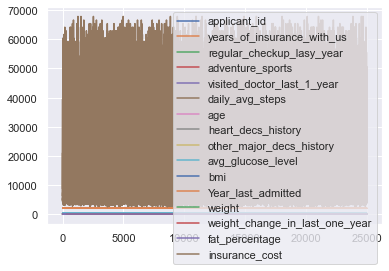

In [21]:
# Visualize the data
# If the data shows patterns or trends that repeat over a specific time period, this might indicate the frequency of data collection
df.plot()

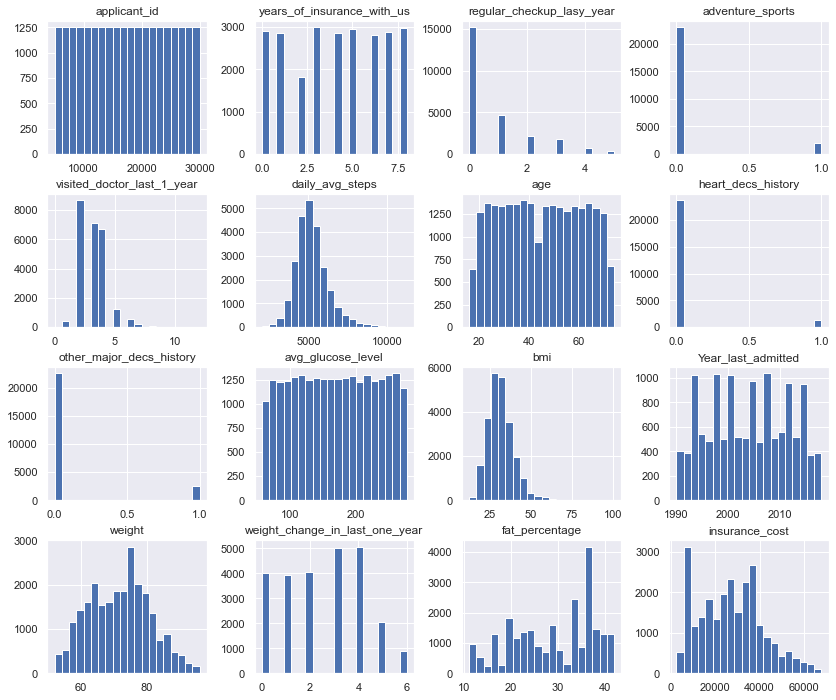

In [22]:
# Visualize the distribution of each column using a histogram
df.hist(bins=20, figsize=(14,12))
plt.show()

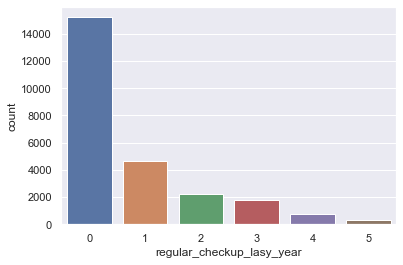

In [23]:
sns.countplot(data=df, x='regular_checkup_lasy_year');

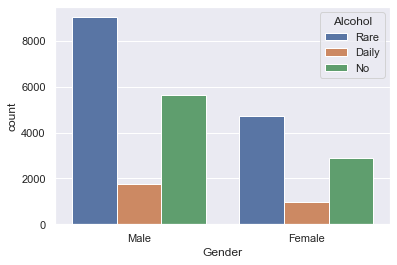

In [24]:
sns.countplot(data=df, x='Gender', hue='Alcohol');

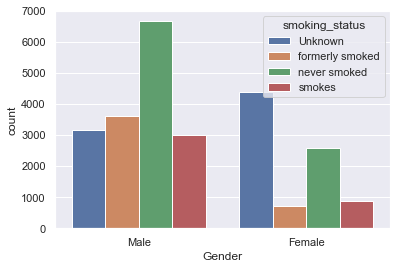

In [25]:
sns.countplot(data=df, x='Gender', hue='smoking_status');

# Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

In [26]:
df.drop(['applicant_id'], 1, inplace=True)

In [27]:
df.tail()

years_of_insurance_with_us  regular_checkup_lasy_year  \
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  \
24995        225 to 250             5614   22                   0   
24996        200 to 225             4719   58                   0   
24997        150 to 175             5624   34                   0   
24998        225 to 250            10777   27                   0   
24999        150 to 175             5882   22                   1   

       other_major_decs_history Gender  avg_glucose_level   bmi  \
24995                         0   Male                145  36.1   
24996                         0   Male                134  31.3   
24997                         1   Male                151   NaN   
24998                         0   Male                 66  26.6   
24999                         0   Male                245  41.6   

        smoking_status  Year_last_admitted     Location  weight  \
24995           smokes              2000.0       Kanpur      79   
24996     never smoked              2009.0       Kanpur      66   
24997          Unknown                 NaN  Bhubaneswar      76   
24998          Unknown                 NaN        Surat      74   
24999  formerly smoked              2014.0      Chennai      57   

      covered_by_any_other_company Alcohol  exercise  \
24995                            Y    Rare  Moderate   
24996                            N    Rare  Moderate   
24997                            N    Rare  Moderate   
24998                            N    Rare  Moderate   
24999                            N      No        No   

       weight_change_in_last_one_year  fat_percentage  insurance_cost  
24995                               4              40           39488  
24996                               2              28           14808  
24997                               1              35           33318  
24998                               0              40           30850  
24999                               4              21            6170

In [28]:
numerical = ['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'adventure_sports', 'visited_doctor_last_1_year','cholesterol_level','daily_avg_steps','age', 'heart_decs_history','other_major_decs_history', 'avg_glucose_level','bmi','Year_last_admitted','weight','weight_change_in_last_one_year','fat_percentage','insurance_cost']
categorical = ['Occupation', 'Gender', 'smoking_status', 'Location', 'Alcohol','exercise','covered_by_any_other_company']

In [29]:
#This class is used to style our output in various formats 
class style:
#These are the ANSI escape sequences to set Graphics in our output
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   BLINK = '\033[5m'
   END = '\033[0m'

In [30]:
def univariate_analysis_categorical(cat, i):
    print(f"\t\t{style.BOLD}Univariate Analysis of {cat}")
    print(f"-----------------------------------------------------------{style.END}")
    print(f"{i+1}. No of unique values in {style.BOLD}{cat}{style.END} are: {df[cat].nunique()}. \nThe distribution is as follows:")
    print(f"{style.BOLD}{cat}{style.END}\n{df[cat].value_counts()}\n")
    vc = df[cat].value_counts()
    if len(vc.index)<=5:
        g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)
    elif len(vc.index)>5 and len(vc.index)<=15:
        g = sns.countplot(y=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)
    elif len(vc.index)>15:
        g = sns.countplot(x=cat, data=df, palette = 'pastel',order = df[cat].value_counts().index)
        g.set_xticklabels(labels = g.get_xticklabels(), rotation = 90)
    plt.show()
    print("\t")

		Univariate Analysis of Occupation
-----------------------------------------------------------
1. No of unique values in Occupation are: 3. 
The distribution is as follows:
Occupation
Student     10169
Business    10020
Salried      4811
Name: Occupation, dtype: int64



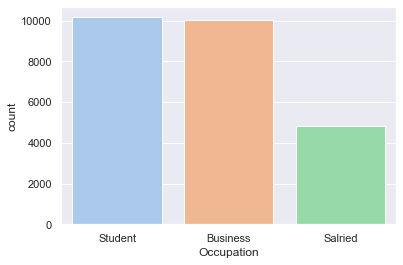

	
		Univariate Analysis of Gender
-----------------------------------------------------------
2. No of unique values in Gender are: 2. 
The distribution is as follows:
Gender
Male      16422
Female     8578
Name: Gender, dtype: int64



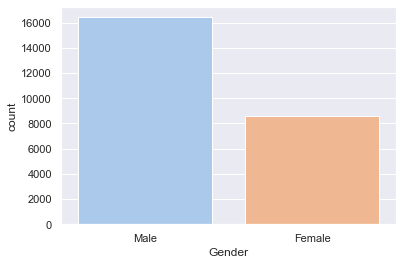

	
		Univariate Analysis of smoking_status
-----------------------------------------------------------
3. No of unique values in smoking_status are: 4. 
The distribution is as follows:
smoking_status
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: smoking_status, dtype: int64



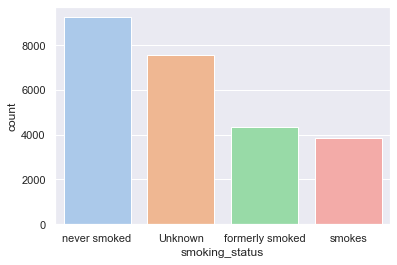

	
		Univariate Analysis of Location
-----------------------------------------------------------
4. No of unique values in Location are: 15. 
The distribution is as follows:
Location
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: Location, dtype: int64



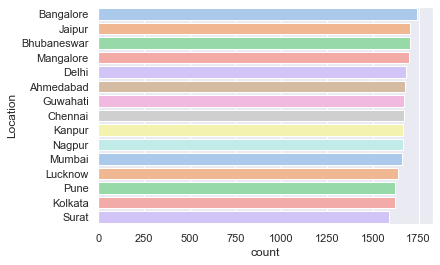

	
		Univariate Analysis of Alcohol
-----------------------------------------------------------
5. No of unique values in Alcohol are: 3. 
The distribution is as follows:
Alcohol
Rare     13752
No        8541
Daily     2707
Name: Alcohol, dtype: int64



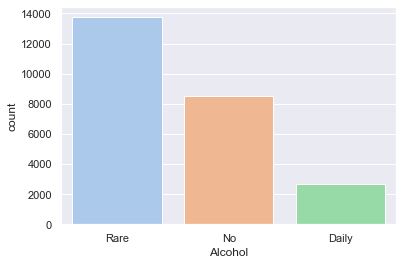

	
		Univariate Analysis of exercise
-----------------------------------------------------------
6. No of unique values in exercise are: 3. 
The distribution is as follows:
exercise
Moderate    14638
Extreme      5248
No           5114
Name: exercise, dtype: int64



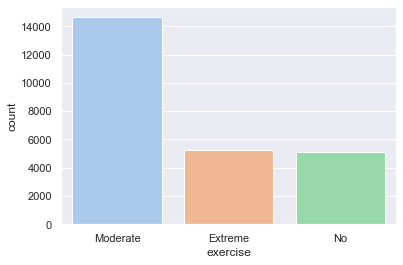

	
		Univariate Analysis of covered_by_any_other_company
-----------------------------------------------------------
7. No of unique values in covered_by_any_other_company are: 2. 
The distribution is as follows:
covered_by_any_other_company
N    17418
Y     7582
Name: covered_by_any_other_company, dtype: int64



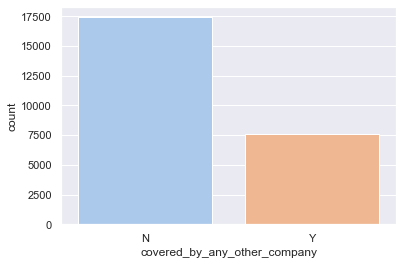

In [31]:


for i,x in enumerate(categorical):
    if x not in ['Model']:
        univariate_analysis_categorical(x, i)  


#Analyzing the Continuous(numerical) Variables
#Let's check for outliers in our numerical variables

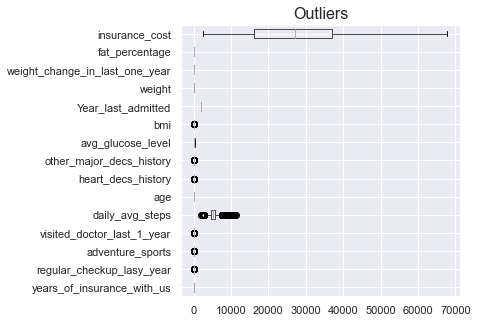

In [32]:
plt.figure(figsize=(5,5))
df[numerical].boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

In [33]:
df[numerical].dtypes

years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
avg_glucose_level                   int64
bmi                               float64
Year_last_admitted                float64
weight                              int64
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                      int64
dtype: object

In [34]:
df.cholesterol_level.value_counts()

150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: cholesterol_level, dtype: int64

#need to change datatype for the column cholesterol_level

In [35]:
df.cholesterol_level.unique()

array(['125 to 150', '150 to 175', '200 to 225', '175 to 200',
       '225 to 250'], dtype=object)

In [36]:
df1 = pd.DataFrame({'range': ['125 to 150', '150 to 175', '200 to 225', '175 to 200', '225 to 250']})


In [37]:
def range_to_midpoint(range_str):
    start, end = map(int, re.findall(r'\d+', range_str))
    return int((start + end) / 2)


In [38]:
# Convert the range strings in the 'range' column to midpoint integer values
df1['midpoint'] = df['cholesterol_level'].apply(range_to_midpoint)

In [39]:
# Change the data type of the 'midpoint' column to integer
df1['midpoint'] = df1['midpoint'].astype(int)

In [40]:
df['cholesterol_level'] = df1['midpoint']
df['cholesterol_level']

0        137.0
1        162.0
2        212.0
3        187.0
4        162.0
         ...  
24995      NaN
24996      NaN
24997      NaN
24998      NaN
24999      NaN
Name: cholesterol_level, Length: 25000, dtype: float64

In [41]:
df[numerical].dtypes

years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
visited_doctor_last_1_year          int64
cholesterol_level                 float64
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
avg_glucose_level                   int64
bmi                               float64
Year_last_admitted                float64
weight                              int64
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                      int64
dtype: object

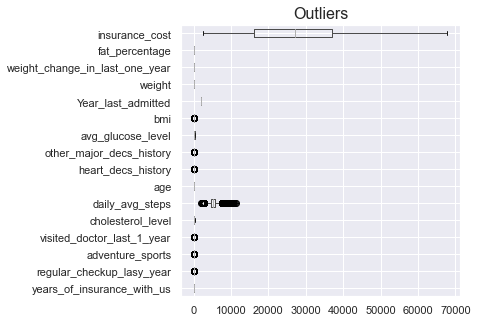

In [42]:
#Let's check for outliers in our numerical variables
plt.figure(figsize=(5,5))
df[numerical].boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

In [43]:
# Number of outliers
def outlier_check(data,n):
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_range= Q1-(n * IQR)
            upper_range= Q3+(n * IQR)
            print(f"{style.BOLD}{col}{style.END}")
            print("Number of outliers:",data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])
            print("Percentage of outliers:{0:10.3f}".format(((data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])/data.shape[0])*100),"%\n")

In [44]:
outlier_check(df, 1.5)

years_of_insurance_with_us
Number of outliers: 0
Percentage of outliers:     0.000 %

regular_checkup_lasy_year
Number of outliers: 2943
Percentage of outliers:    11.772 %

adventure_sports
Number of outliers: 2043
Percentage of outliers:     8.172 %

visited_doctor_last_1_year
Number of outliers: 96
Percentage of outliers:     0.384 %

cholesterol_level
Number of outliers: 0
Percentage of outliers:     0.000 %

daily_avg_steps
Number of outliers: 952
Percentage of outliers:     3.808 %

age
Number of outliers: 0
Percentage of outliers:     0.000 %

heart_decs_history
Number of outliers: 1366
Percentage of outliers:     5.464 %

other_major_decs_history
Number of outliers: 2454
Percentage of outliers:     9.816 %

avg_glucose_level
Number of outliers: 0
Percentage of outliers:     0.000 %

bmi
Number of outliers: 549
Percentage of outliers:     2.196 %

Year_last_admitted
Number of outliers: 0
Percentage of outliers:     0.000 %

weight
Number of outliers: 0
Percentage of outliers:   

Bivariate Analysis:¶
###Now, let's begin Bi-variate Analysis. Here, we analyse 2 variables trying to find any relation between them

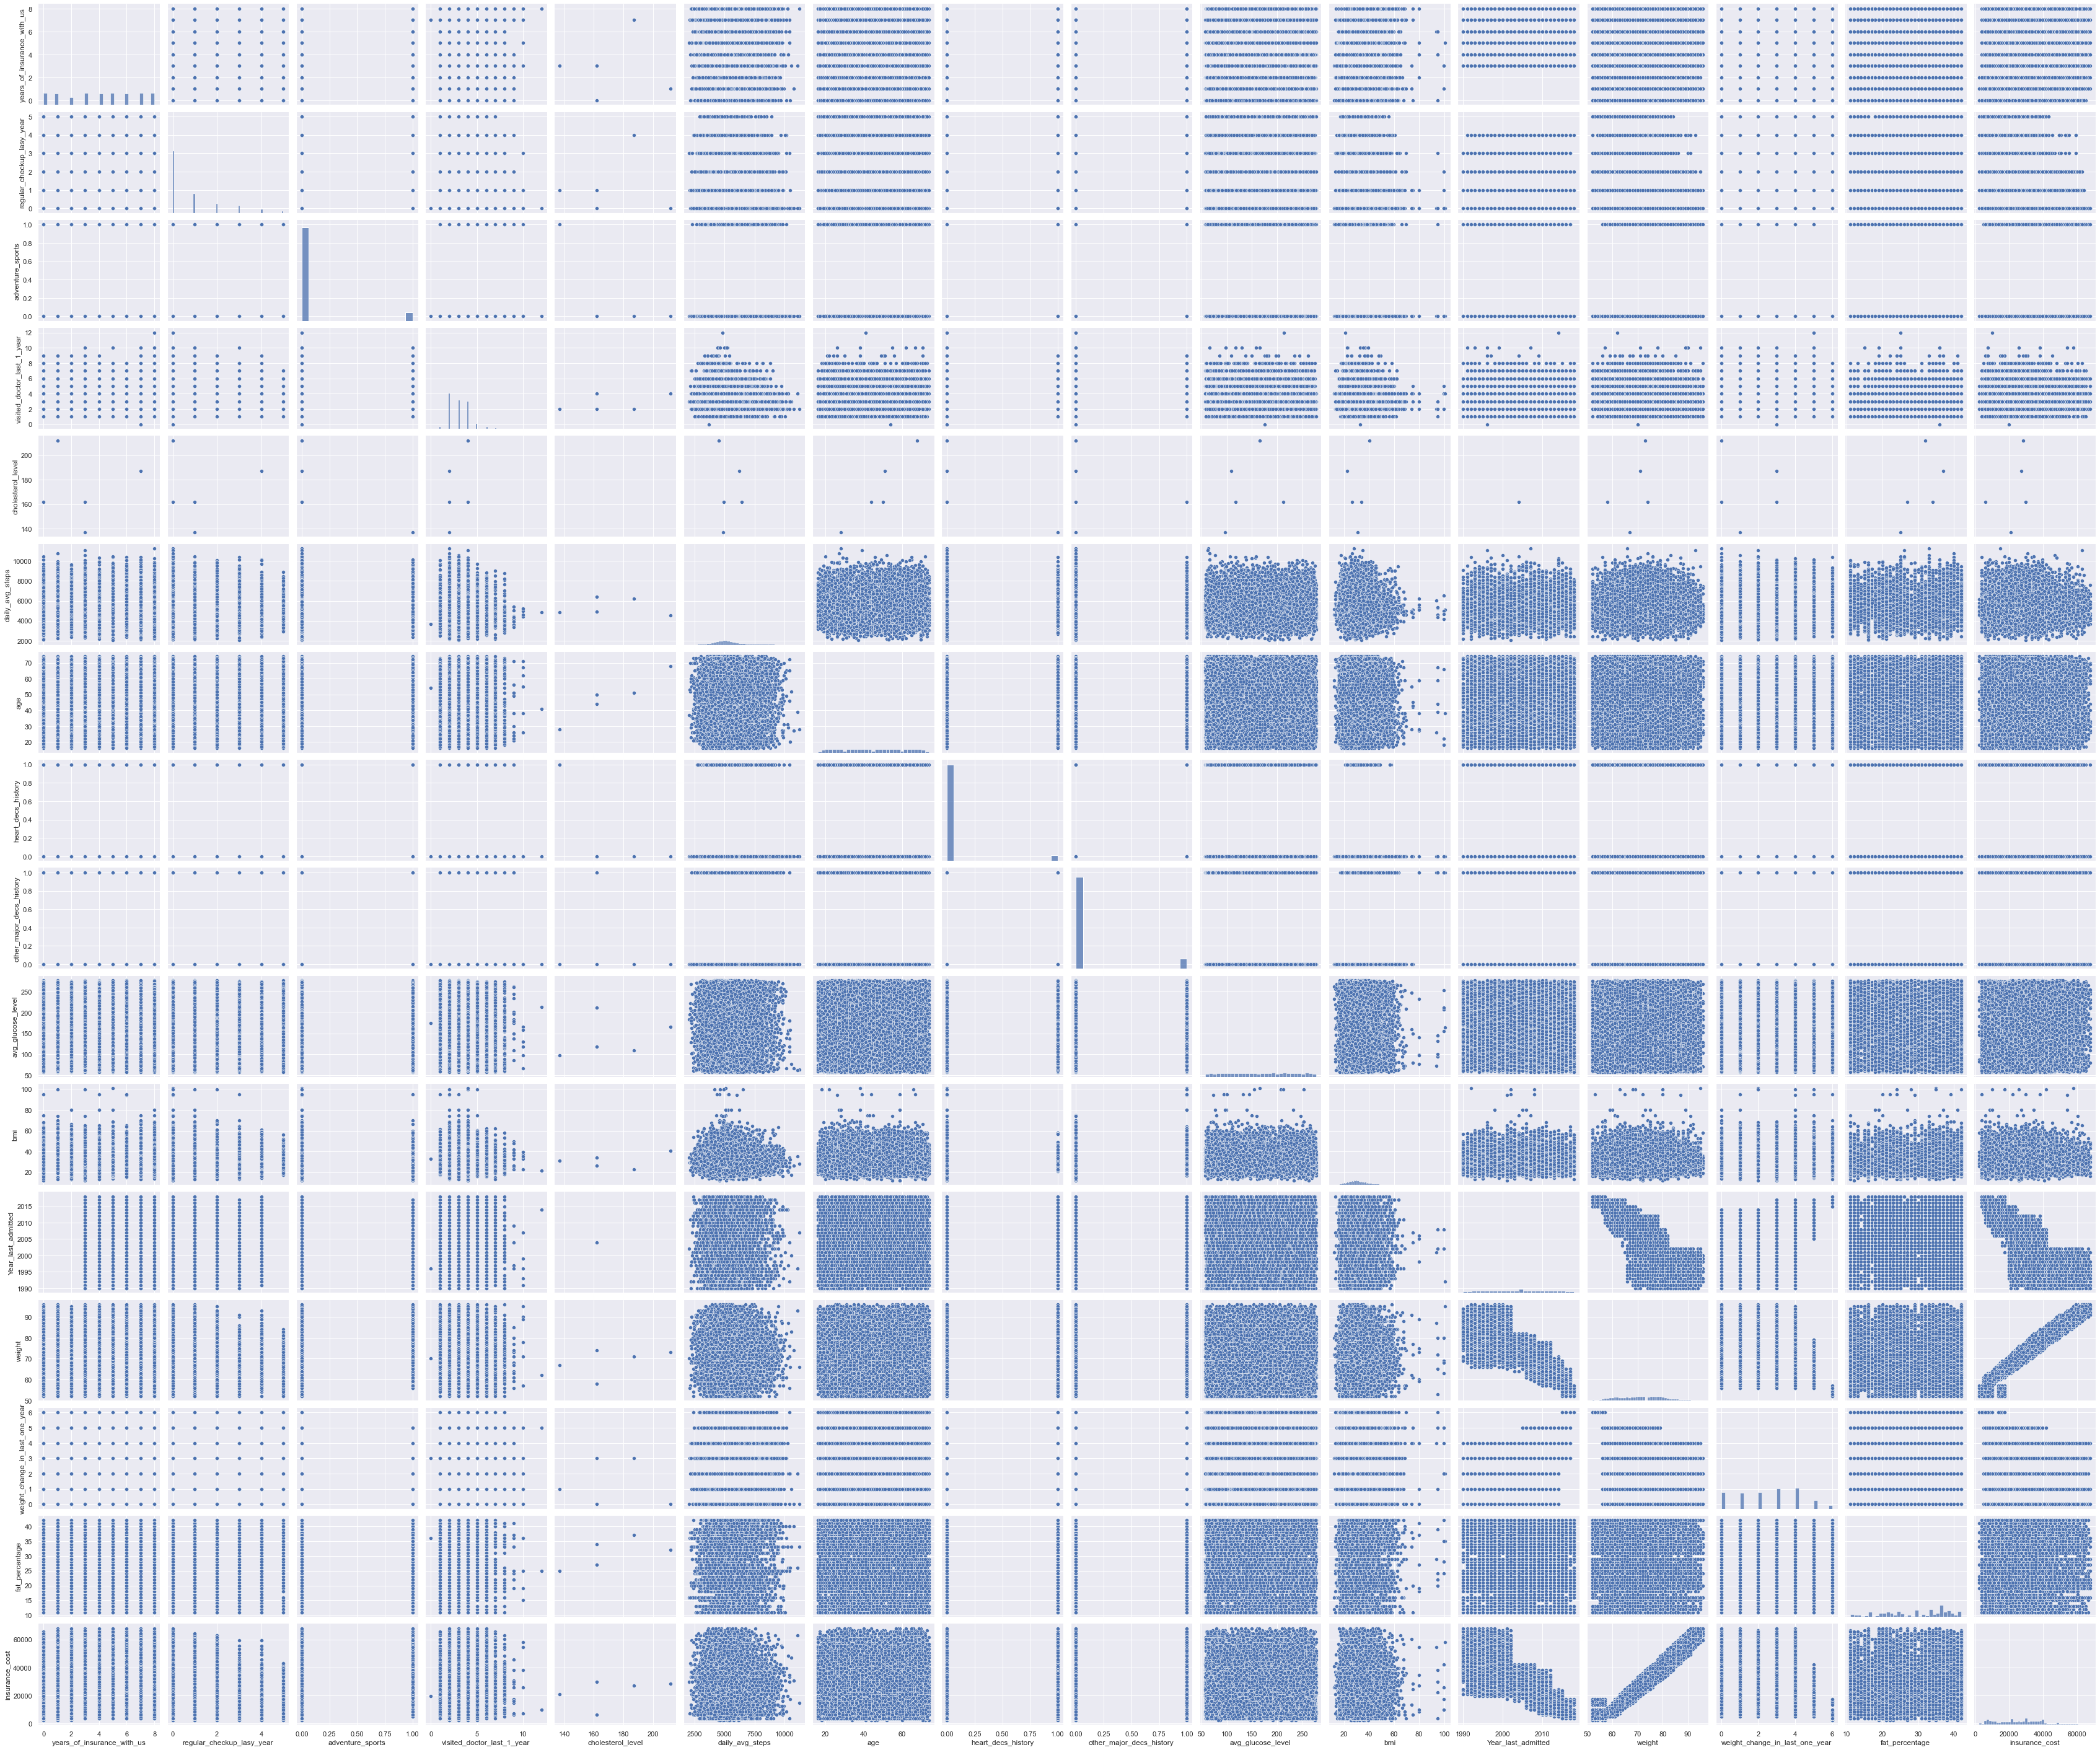

In [45]:

sns.set(rc={"figure.figsize":(8,8)})
sns.pairplot(df, height=2.5, aspect=1.2)
plt.show()

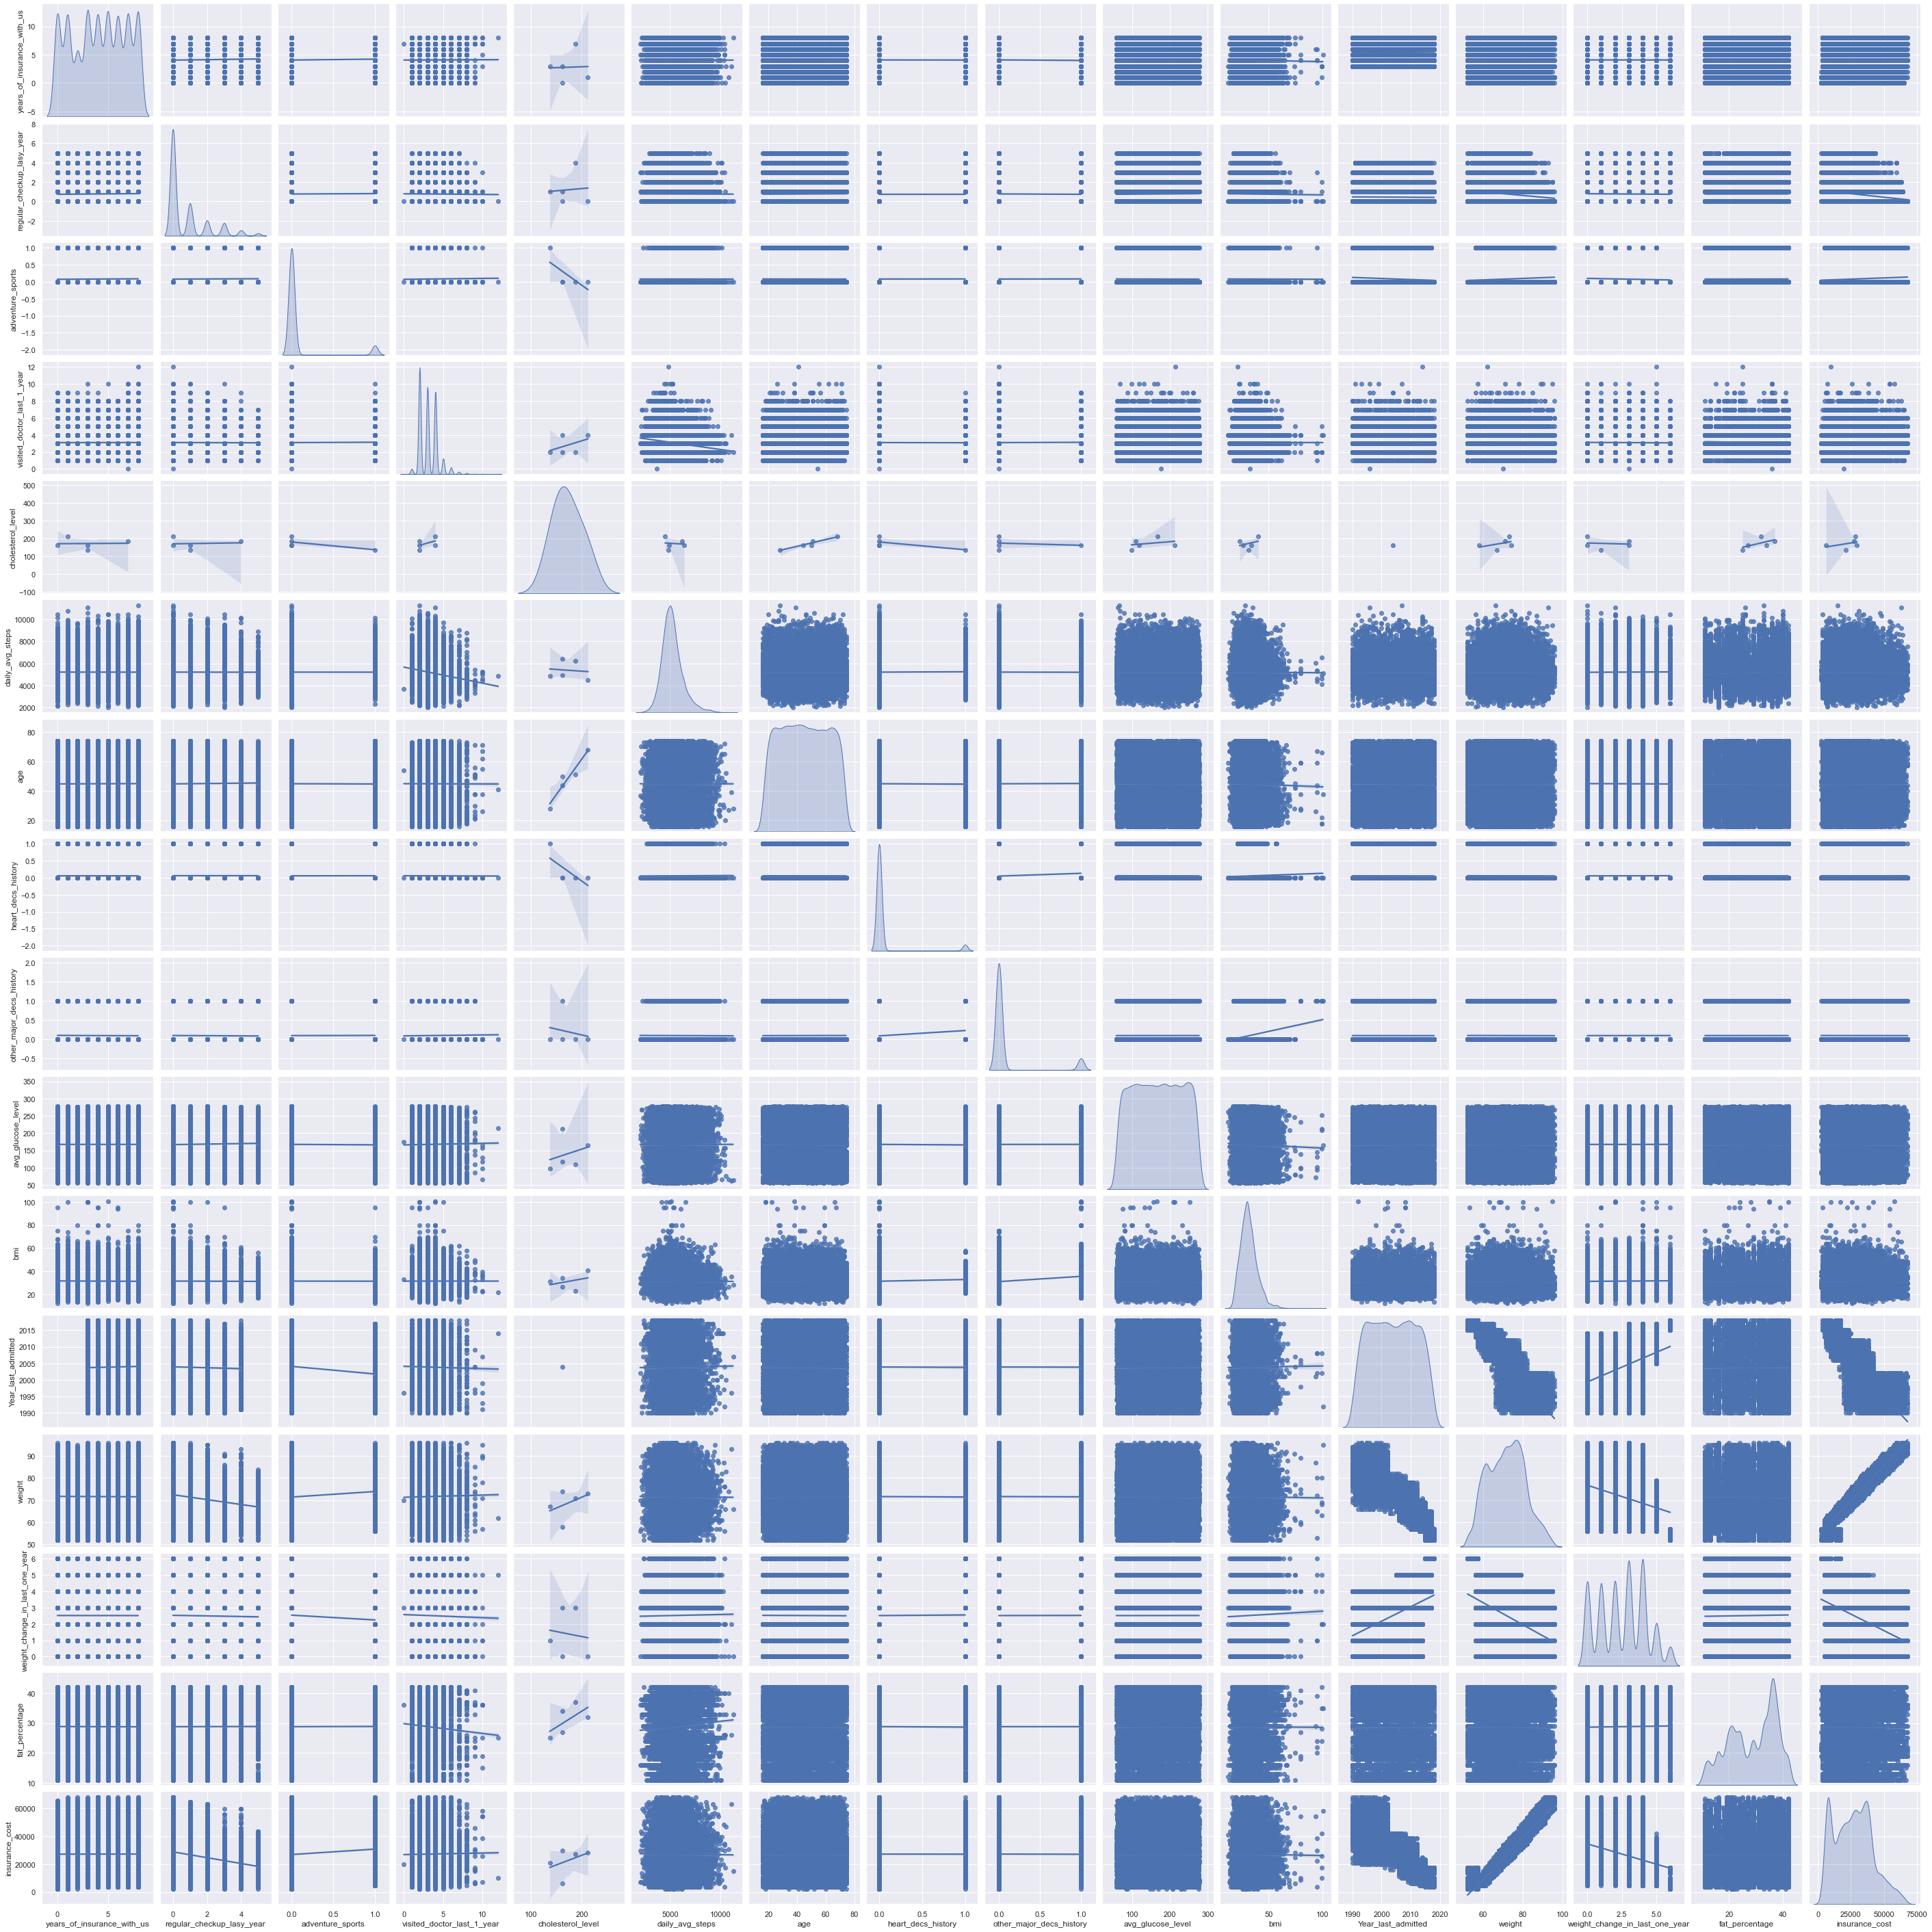

In [46]:
#Let's add a regression line to the above graph to get a better picture
sns.pairplot(data = df[numerical], kind='reg', diag_kind = 'kde')

<AxesSubplot:>

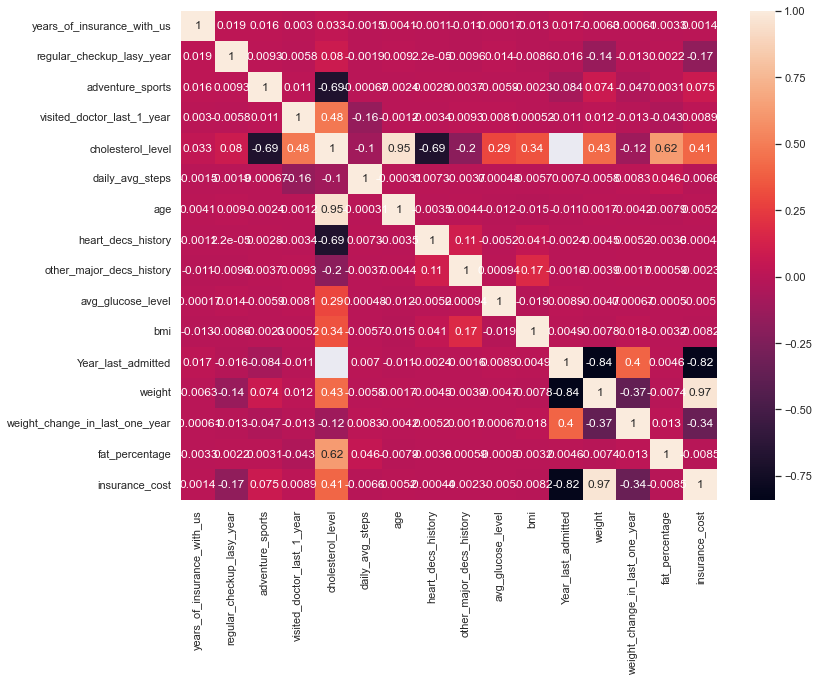

In [47]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

In [48]:
#Removal of unwanted variables (if applicable)

In [49]:
#From the above EDA, we can understand that some of the columns are unwanted hence dropping 

In [50]:
df.drop(['cholesterol_level','fat_percentage'],axis=1,inplace=True)

In [51]:
df.head()

years_of_insurance_with_us  regular_checkup_lasy_year  adventure_sports  \
0                           3                          1                 1   
1                           0                          0                 0   
2                           1                          0                 0   
3                           7                          4                 0   
4                           3                          1                 0   

  Occupation  visited_doctor_last_1_year  daily_avg_steps  age  \
0    Salried                           2             4866   28   
1    Student                           4             6411   50   
2   Business                           4             4509   68   
3   Business                           2             6214   51   
4    Student                           2             4938   44   

   heart_decs_history  other_major_decs_history  Gender  avg_glucose_level  \
0                   1                         0    Male                 97   
1                   0                         0    Male                212   
2                   0                         0  Female                166   
3                   0                         0  Female                109   
4                   0                         1    Male                118   

    bmi   smoking_status  Year_last_admitted   Location  weight  \
0  31.2          Unknown                 NaN    Chennai      67   
1  34.2  formerly smoked                 NaN     Jaipur      58   
2  40.4  formerly smoked                 NaN     Jaipur      73   
3  22.9          Unknown                 NaN    Chennai      71   
4  26.5     never smoked              2004.0  Bangalore      74   

  covered_by_any_other_company Alcohol  exercise  \
0                            N    Rare  Moderate   
1                            N    Rare  Moderate   
2                            N   Daily   Extreme   
3                            Y    Rare        No   
4                            N      No   Extreme   

   weight_change_in_last_one_year  insurance_cost  
0                               1           20978  
1                               3            6170  
2                               0           28382  
3                               3           27148  
4                               0           29616

In [52]:
##Handling Missing 

In [53]:
# check count of null records in each column
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
insurance_cost                        0
dtype: int64

In [54]:
#rounding the percentage to 2 digits
round((df.isnull().sum()/df.shape[0])*100,2)

years_of_insurance_with_us         0.00
regular_checkup_lasy_year          0.00
adventure_sports                   0.00
Occupation                         0.00
visited_doctor_last_1_year         0.00
daily_avg_steps                    0.00
age                                0.00
heart_decs_history                 0.00
other_major_decs_history           0.00
Gender                             0.00
avg_glucose_level                  0.00
bmi                                3.96
smoking_status                     0.00
Year_last_admitted                47.52
Location                           0.00
weight                             0.00
covered_by_any_other_company       0.00
Alcohol                            0.00
exercise                           0.00
weight_change_in_last_one_year     0.00
insurance_cost                     0.00
dtype: float64

If a year column has a high percentage of missing values, such as 47%, dropping the missing values may result in a significant loss of data. Therefore, imputation of missing values may be more appropriate.

In [55]:
#The mean imputation may not always be the best method for imputing missing data, and other methods such as regression imputation or multiple imputation may be more appropriate depending on the specific context and characteristics of the data.

In [56]:
# replace missing values with zero

In [57]:
df.Year_last_admitted.fillna('0.00', inplace=True)

In [58]:
df.isna().sum()

years_of_insurance_with_us          0
regular_checkup_lasy_year           0
adventure_sports                    0
Occupation                          0
visited_doctor_last_1_year          0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                               990
smoking_status                      0
Year_last_admitted                  0
Location                            0
weight                              0
covered_by_any_other_company        0
Alcohol                             0
exercise                            0
weight_change_in_last_one_year      0
insurance_cost                      0
dtype: int64

In [59]:
## Let's drop these missing values 
df.dropna(axis=0, inplace=True)


In [60]:
##Outlier treatment

In [61]:
df.isna().sum()

years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Year_last_admitted                0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
insurance_cost                    0
dtype: int64

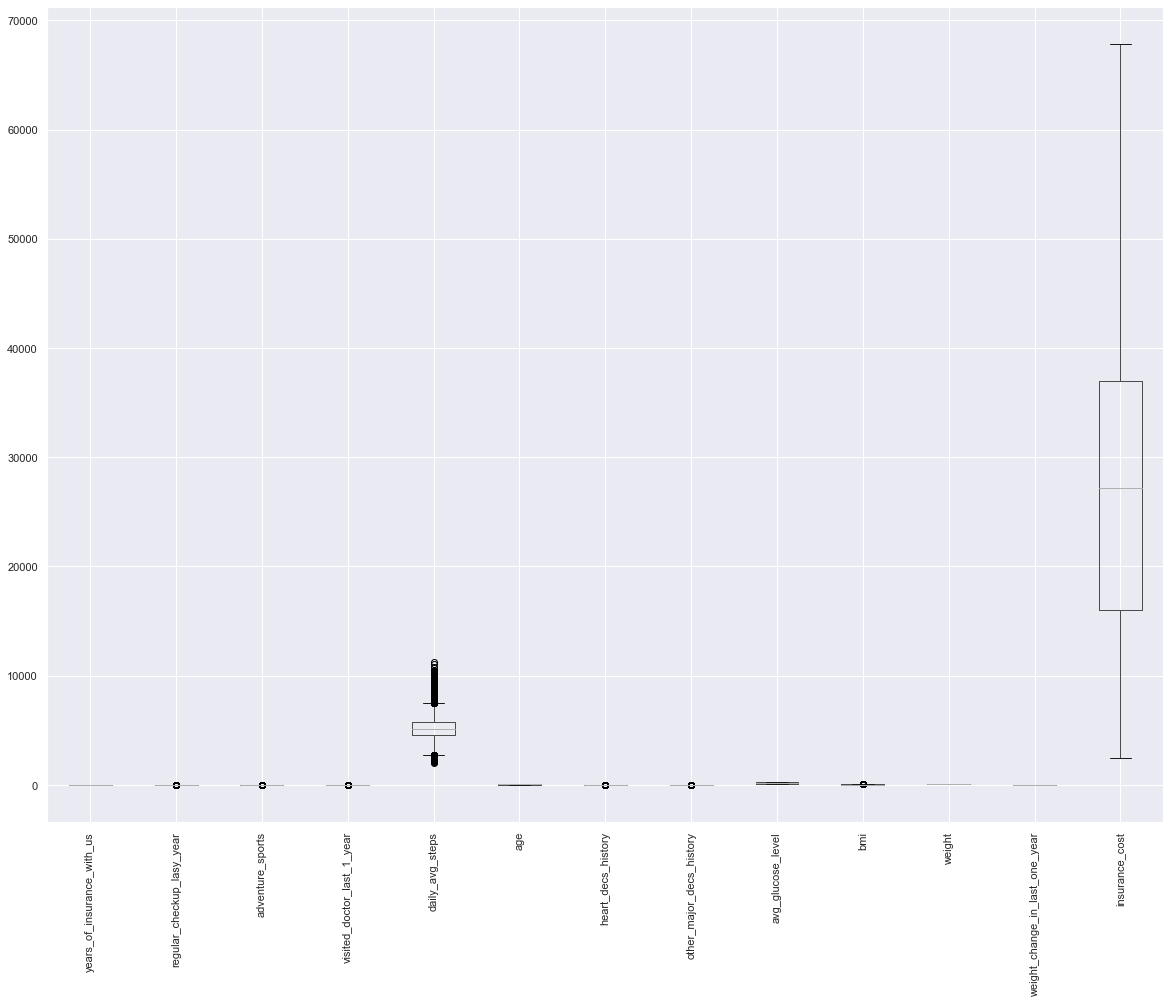

In [62]:
df.boxplot(figsize=(20,15)) 
plt.xticks(rotation=90) 
plt.show()

In [63]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [64]:
for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

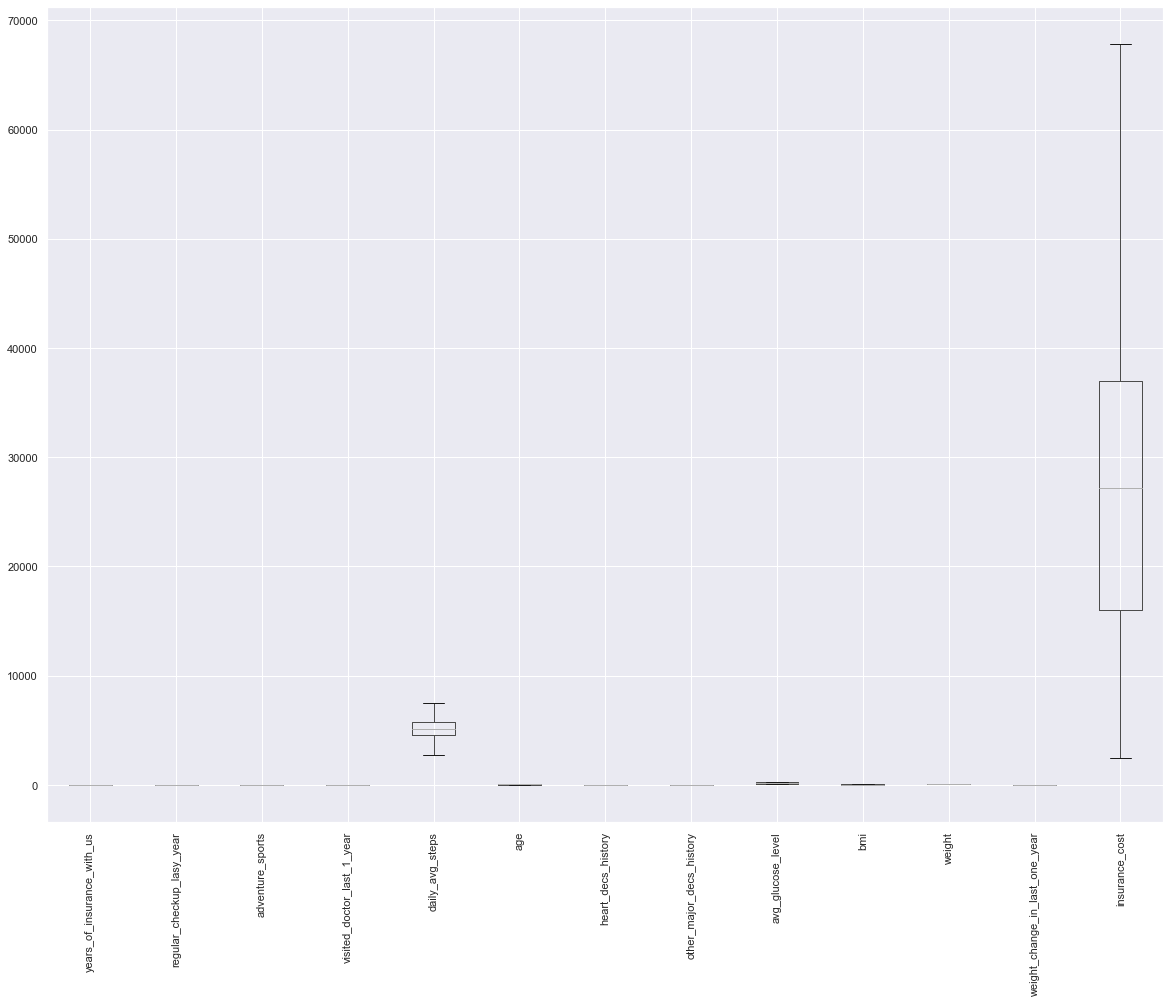

In [65]:
#plotting boxplots after outlier treatment
df.boxplot(figsize=(20,15)) 
plt.xticks(rotation=90) 
plt.show()

In [66]:
df.insurance_cost

0        20978.0
1         6170.0
2        28382.0
3        27148.0
4        29616.0
          ...   
24994    13574.0
24995    39488.0
24996    14808.0
24998    30850.0
24999     6170.0
Name: insurance_cost, Length: 24010, dtype: float64

In [67]:
#Let's look at the distribution of insurance_cost at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 99.5)))

0.5% properties have a price lower than  3702.00
  1% properties have a price lower than  3702.00
  5% properties have a price lower than  6170.00
 10% properties have a price lower than  7404.00
 90% properties have a price lower than  45658.00
 95% properties have a price lower than  53062.00
 99% properties have a price lower than  62934.00
99.5% properties have a price lower than  64168.00


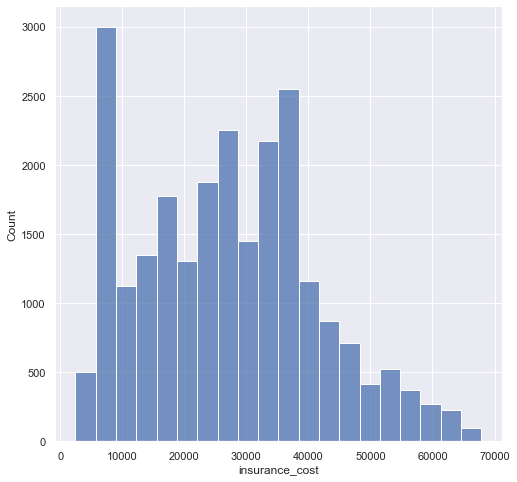

In [68]:
sns.histplot(df['insurance_cost'],bins=20);

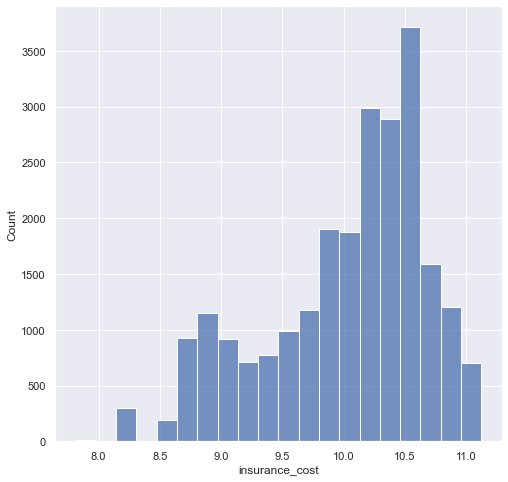

In [69]:
sns.histplot(np.log(df["insurance_cost"]),bins=20);

In [70]:
df.head()

years_of_insurance_with_us  regular_checkup_lasy_year  adventure_sports  \
0                         3.0                        1.0               0.0   
1                         0.0                        0.0               0.0   
2                         1.0                        0.0               0.0   
3                         7.0                        2.5               0.0   
4                         3.0                        1.0               0.0   

  Occupation  visited_doctor_last_1_year  daily_avg_steps   age  \
0    Salried                         2.0           4866.0  28.0   
1    Student                         4.0           6411.0  50.0   
2   Business                         4.0           4509.0  68.0   
3   Business                         2.0           6214.0  51.0   
4    Student                         2.0           4938.0  44.0   

   heart_decs_history  other_major_decs_history  Gender  avg_glucose_level  \
0                 0.0                       0.0    Male               97.0   
1                 0.0                       0.0    Male              212.0   
2                 0.0                       0.0  Female              166.0   
3                 0.0                       0.0  Female              109.0   
4                 0.0                       0.0    Male              118.0   

    bmi   smoking_status Year_last_admitted   Location  weight  \
0  31.2          Unknown               0.00    Chennai    67.0   
1  34.2  formerly smoked               0.00     Jaipur    58.0   
2  40.4  formerly smoked               0.00     Jaipur    73.0   
3  22.9          Unknown               0.00    Chennai    71.0   
4  26.5     never smoked             2004.0  Bangalore    74.0   

  covered_by_any_other_company Alcohol  exercise  \
0                            N    Rare  Moderate   
1                            N    Rare  Moderate   
2                            N   Daily   Extreme   
3                            Y    Rare        No   
4                            N      No   Extreme   

   weight_change_in_last_one_year  insurance_cost  
0                             1.0         20978.0  
1                             3.0          6170.0  
2                             0.0         28382.0  
3                             3.0         27148.0  
4                             0.0         29616.0

In [71]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale


StandardScaler()

In [72]:
df_num = df.drop(['insurance_cost','Year_last_admitted','years_of_insurance_with_us'], axis=1)

In [73]:
df_num.head()

regular_checkup_lasy_year  adventure_sports Occupation  \
0                        1.0               0.0    Salried   
1                        0.0               0.0    Student   
2                        0.0               0.0   Business   
3                        2.5               0.0   Business   
4                        1.0               0.0    Student   

   visited_doctor_last_1_year  daily_avg_steps   age  heart_decs_history  \
0                         2.0           4866.0  28.0                 0.0   
1                         4.0           6411.0  50.0                 0.0   
2                         4.0           4509.0  68.0                 0.0   
3                         2.0           6214.0  51.0                 0.0   
4                         2.0           4938.0  44.0                 0.0   

   other_major_decs_history  Gender  avg_glucose_level   bmi   smoking_status  \
0                       0.0    Male               97.0  31.2          Unknown   
1                       0.0    Male              212.0  34.2  formerly smoked   
2                       0.0  Female              166.0  40.4  formerly smoked   
3                       0.0  Female              109.0  22.9          Unknown   
4                       0.0    Male              118.0  26.5     never smoked   

    Location  weight covered_by_any_other_company Alcohol  exercise  \
0    Chennai    67.0                            N    Rare  Moderate   
1     Jaipur    58.0                            N    Rare  Moderate   
2     Jaipur    73.0                            N   Daily   Extreme   
3    Chennai    71.0                            Y    Rare        No   
4  Bangalore    74.0                            N      No   Extreme   

   weight_change_in_last_one_year  
0                             1.0  
1                             3.0  
2                             0.0  
3                             3.0  
4                             0.0

#When you are performing clustering, the target variable should not be used as an input to the clustering algorithm

In [74]:
df_num = df_num.select_dtypes(include=np.number)
df_num.head()

regular_checkup_lasy_year  adventure_sports  visited_doctor_last_1_year  \
0                        1.0               0.0                         2.0   
1                        0.0               0.0                         4.0   
2                        0.0               0.0                         4.0   
3                        2.5               0.0                         2.0   
4                        1.0               0.0                         2.0   

   daily_avg_steps   age  heart_decs_history  other_major_decs_history  \
0           4866.0  28.0                 0.0                       0.0   
1           6411.0  50.0                 0.0                       0.0   
2           4509.0  68.0                 0.0                       0.0   
3           6214.0  51.0                 0.0                       0.0   
4           4938.0  44.0                 0.0                       0.0   

   avg_glucose_level   bmi  weight  weight_change_in_last_one_year  
0               97.0  31.2    67.0                             1.0  
1              212.0  34.2    58.0                             3.0  
2              166.0  40.4    73.0                             0.0  
3              109.0  22.9    71.0                             3.0  
4              118.0  26.5    74.0                             0.0

In [75]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_DF = X.fit_transform(df_num)
scaled_DF

array([[ 0.37511745,  0.        , -0.98078641, ..., -0.00513152,
        -0.49489071, -0.89831884],
       [-0.713882  ,  0.        ,  0.80185414, ...,  0.40345005,
        -1.45913042,  0.28504798],
       [-0.713882  ,  0.        ,  0.80185414, ...,  1.24785194,
         0.14793576, -1.49000225],
       ...,
       [-0.713882  ,  0.        ,  0.80185414, ...,  0.00848787,
        -0.60202846, -0.30663543],
       [-0.713882  ,  0.        , -0.98078641, ..., -0.63162325,
         0.25507351, -1.49000225],
       [ 1.4641169 ,  0.        ,  0.80185414, ...,  1.41128457,
        -1.56626817,  0.87673139]])

In [76]:
scaled_DF = pd.DataFrame(scaled_DF, index=df_num.index, columns=df_num.columns)
scaled_DF.head()

regular_checkup_lasy_year  adventure_sports  visited_doctor_last_1_year  \
0                   0.375117               0.0                   -0.980786   
1                  -0.713882               0.0                    0.801854   
2                  -0.713882               0.0                    0.801854   
3                   2.008617               0.0                   -0.980786   
4                   0.375117               0.0                   -0.980786   

   daily_avg_steps       age  heart_decs_history  other_major_decs_history  \
0        -0.333074 -1.051680                 0.0                       0.0   
1         1.259849  0.315844                 0.0                       0.0   
2        -0.701147  1.434727                 0.0                       0.0   
3         1.056739  0.378004                 0.0                       0.0   
4        -0.258841 -0.057117                 0.0                       0.0   

   avg_glucose_level       bmi    weight  weight_change_in_last_one_year  
0          -1.124469 -0.005132 -0.494891                       -0.898319  
1           0.708871  0.403450 -1.459130                        0.285048  
2          -0.024465  1.247852  0.147936                       -1.490002  
3          -0.933164 -1.135541 -0.066340                        0.285048  
4          -0.789685 -0.645243  0.255074                       -1.490002

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [78]:
HClust = linkage(scaled_DF, method = 'ward')

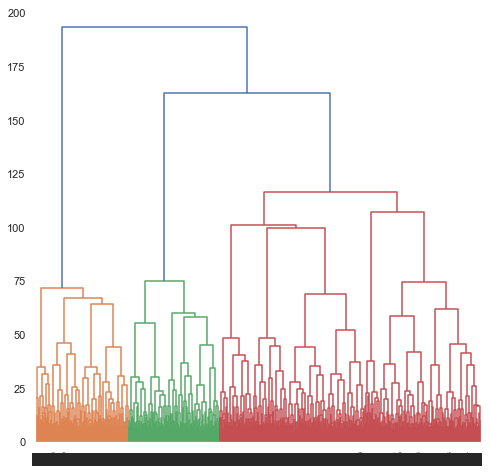

In [79]:
dend = dendrogram(HClust)

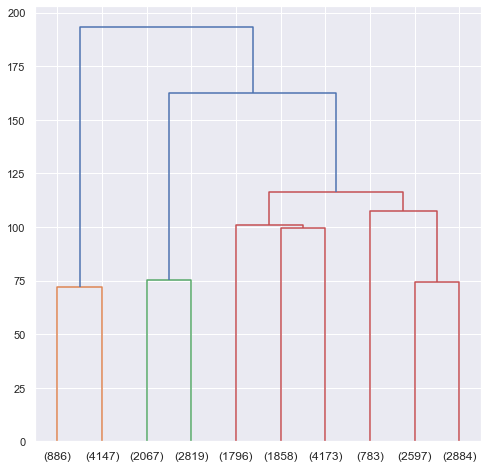

In [80]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [81]:
from scipy.cluster.hierarchy import fcluster

In [82]:
#Method 1

clusters = fcluster(HClust, 3, criterion='maxclust')
clusters

array([3, 2, 3, ..., 3, 3, 1], dtype=int32)

In [83]:
df_num['clusters'] = clusters

In [84]:
df_num.head()

regular_checkup_lasy_year  adventure_sports  visited_doctor_last_1_year  \
0                        1.0               0.0                         2.0   
1                        0.0               0.0                         4.0   
2                        0.0               0.0                         4.0   
3                        2.5               0.0                         2.0   
4                        1.0               0.0                         2.0   

   daily_avg_steps   age  heart_decs_history  other_major_decs_history  \
0           4866.0  28.0                 0.0                       0.0   
1           6411.0  50.0                 0.0                       0.0   
2           4509.0  68.0                 0.0                       0.0   
3           6214.0  51.0                 0.0                       0.0   
4           4938.0  44.0                 0.0                       0.0   

   avg_glucose_level   bmi  weight  weight_change_in_last_one_year  clusters  
0               97.0  31.2    67.0                             1.0         3  
1              212.0  34.2    58.0                             3.0         2  
2              166.0  40.4    73.0                             0.0         3  
3              109.0  22.9    71.0                             3.0         1  
4              118.0  26.5    74.0                             0.0         3

Cluster Frequency

In [85]:
df_num.clusters.value_counts().sort_index()

1     5033
2     4886
3    14091
Name: clusters, dtype: int64

In [86]:
aggdata=df_num.groupby('clusters').mean()
aggdata['Freq']=df_num.clusters.value_counts().sort_index()
aggdata

regular_checkup_lasy_year  adventure_sports  \
clusters                                                
1                          2.208921               0.0   
2                          0.268522               0.0   
3                          0.234902               0.0   

          visited_doctor_last_1_year  daily_avg_steps        age  \
clusters                                                           
1                           3.034373      5223.970172  44.943374   
2                           2.840565      5188.692233  46.454769   
3                           3.214037      5176.706976  44.377546   

          heart_decs_history  other_major_decs_history  avg_glucose_level  \
clusters                                                                    
1                        0.0                       0.0         169.380091   
2                        0.0                       0.0         165.415268   
3                        0.0                       0.0         167.610319   

                bmi     weight  weight_change_in_last_one_year   Freq  
clusters                                                               
1         31.375859  69.241804                        2.495331   5033  
2         31.194402  62.375972                        4.049325   4886  
3         31.203328  75.673409                        1.995529  14091

Creating Clusters using KMeans

In [87]:
# Create K Means cluster and store the result in the object k_means
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 2,random_state=1)

In [88]:
# Fit K means on the scaled_df
k_means.fit(scaled_DF)

KMeans(n_clusters=2, random_state=1)

In [89]:
# Get the labels
k_means.labels_

array([1, 0, 1, ..., 1, 1, 0])

In [90]:
#Within Cluster Sum of Squares
k_means.inertia_

169540.32313321647

Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [91]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_DF)
k_means.inertia_

153617.4731027091

In [92]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_DF)
k_means.inertia_

143193.99827164458

In [93]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_DF)
k_means.inertia_

135684.37416992887

WSS reduces as K keeps increasing

KMeans with K=3

In [94]:
wss =[] 

In [95]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_DF)
labels = k_means.labels_

Cluster evaluation for 3 clusters: the silhouette score

In [96]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [97]:
# Calculating silhouette_score
silhouette_score(scaled_DF,labels,random_state=1)

0.12412235479836226

# KMeans with K=4

In [98]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_DF)
labels = k_means.labels_

In [99]:
silhouette_score(scaled_DF,labels,random_state=1)

0.11103257676329954

silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

In [100]:
#Appending Clusters to the original dataset

In [101]:
df_num["Clus_kmeans4"] = labels
df_num.head()

regular_checkup_lasy_year  adventure_sports  visited_doctor_last_1_year  \
0                        1.0               0.0                         2.0   
1                        0.0               0.0                         4.0   
2                        0.0               0.0                         4.0   
3                        2.5               0.0                         2.0   
4                        1.0               0.0                         2.0   

   daily_avg_steps   age  heart_decs_history  other_major_decs_history  \
0           4866.0  28.0                 0.0                       0.0   
1           6411.0  50.0                 0.0                       0.0   
2           4509.0  68.0                 0.0                       0.0   
3           6214.0  51.0                 0.0                       0.0   
4           4938.0  44.0                 0.0                       0.0   

   avg_glucose_level   bmi  weight  weight_change_in_last_one_year  clusters  \
0               97.0  31.2    67.0                             1.0         3   
1              212.0  34.2    58.0                             3.0         2   
2              166.0  40.4    73.0                             0.0         3   
3              109.0  22.9    71.0                             3.0         1   
4              118.0  26.5    74.0                             0.0         3   

   Clus_kmeans4  
0             3  
1             2  
2             1  
3             0  
4             3

In [102]:
df_num.Clus_kmeans4.value_counts().sort_index()

0    4866
1    5981
2    5665
3    7498
Name: Clus_kmeans4, dtype: int64

In [103]:
clust_profile=df_num.groupby('Clus_kmeans4').mean()
clust_profile['freq']=df_num.Clus_kmeans4.value_counts().sort_index()
clust_profile

regular_checkup_lasy_year  adventure_sports  \
Clus_kmeans4                                                
0                              2.255138               0.0   
1                              0.257649               0.0   
2                              0.269903               0.0   
3                              0.226194               0.0   

              visited_doctor_last_1_year  daily_avg_steps        age  \
Clus_kmeans4                                                           
0                               3.029799      5181.252826  45.286272   
1                               4.177897      4603.531496  45.354790   
2                               2.908561      5217.432237  44.627184   
3                               2.431582      5639.733045  44.553081   

              heart_decs_history  other_major_decs_history  avg_glucose_level  \
Clus_kmeans4                                                                    
0                            0.0                       0.0         169.609125   
1                            0.0                       0.0         169.630329   
2                            0.0                       0.0         167.290909   
3                            0.0                       0.0         164.700720   

                    bmi     weight  weight_change_in_last_one_year  clusters  \
Clus_kmeans4                                                                   
0             31.082655  68.918619                        2.431771  1.108714   
1             30.927955  75.609597                        1.940478  2.897843   
2             31.527617  62.416593                        4.268844  2.219241   
3             31.366284  77.141638                        1.712590  2.904641   

              freq  
Clus_kmeans4        
0             4866  
1             5981  
2             5665  
3             7498

In [104]:
df.duplicated().sum()

0

In [105]:
print(df.dtypes)

years_of_insurance_with_us        float64
regular_checkup_lasy_year         float64
adventure_sports                  float64
Occupation                         object
visited_doctor_last_1_year        float64
daily_avg_steps                   float64
age                               float64
heart_decs_history                float64
other_major_decs_history          float64
Gender                             object
avg_glucose_level                 float64
bmi                               float64
smoking_status                     object
Year_last_admitted                 object
Location                           object
weight                            float64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year    float64
insurance_cost                    float64
dtype: object


In [106]:
df.Year_last_admitted

0          0.00
1          0.00
2          0.00
3          0.00
4        2004.0
          ...  
24994    2013.0
24995    2000.0
24996    2009.0
24998      0.00
24999    2014.0
Name: Year_last_admitted, Length: 24010, dtype: object

In [107]:
df.Year_last_admitted.unique()

array(['0.00', 2004.0, 2003.0, 2007.0, 1994.0, 2010.0, 2017.0, 2002.0,
       1996.0, 2008.0, 1991.0, 1995.0, 2001.0, 2013.0, 2011.0, 2005.0,
       2018.0, 1998.0, 1997.0, 1999.0, 1992.0, 2012.0, 2009.0, 2014.0,
       2000.0, 1993.0, 2016.0, 2006.0, 2015.0, 1990.0], dtype=object)

In [108]:
df['Year_last_admitted'] = pd.to_numeric(df['Year_last_admitted'], errors='coerce').fillna(0).astype(int)

In [109]:
print(df.dtypes)

years_of_insurance_with_us        float64
regular_checkup_lasy_year         float64
adventure_sports                  float64
Occupation                         object
visited_doctor_last_1_year        float64
daily_avg_steps                   float64
age                               float64
heart_decs_history                float64
other_major_decs_history          float64
Gender                             object
avg_glucose_level                 float64
bmi                               float64
smoking_status                     object
Year_last_admitted                  int32
Location                           object
weight                            float64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year    float64
insurance_cost                    float64
dtype: object


Encode the Data

In [110]:
df.Year_last_admitted

0           0
1           0
2           0
3           0
4        2004
         ... 
24994    2013
24995    2000
24996    2009
24998       0
24999    2014
Name: Year_last_admitted, Length: 24010, dtype: int32

In [111]:
replace = {"covered_by_any_other_company": {"Y": 1, "N": 0}}
df["covered_by_any_other_company"] = df["covered_by_any_other_company"].replace(replace)

In [112]:
df.covered_by_any_other_company

In [ ]:
df.select_dtypes(include='object').head()

There are two types of categorical data

Ordinal: Order based like 'Rare','Daily','Moderate'
Nominal: Without any order or ranks like Location, Genders, etc
Here, for now let us convert these into Categorical using pd.Categories to avoid high dimensionality because of OHE(get_dummies)

We are free to use any encoding technique as long as it works.


In [ ]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes


In [ ]:
df.dtypes

#Split the Data

In [ ]:
df.head()

Split the Data

In [ ]:
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

Splitting data into training and test set